### Detección de Diabetes usando ANN

[Implementación RBF-NN](https://towardsdatascience.com/most-effective-way-to-implement-radial-basis-function-neural-network-for-classification-problem-33c467803319)


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

### Data Import

In [2]:
!git clone https://github.com/CristianDiazAlvarez/temporal.git
df = pd.read_csv("temporal/diabetes_data_upload.csv")
df.head()

fatal: destination path 'temporal' already exists and is not an empty directory.


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.iloc[:,1:] = df.iloc[:,1:].apply(LabelEncoder().fit_transform)
df["Age"] -= df["Age"].min()
df["Age"] /= df["Age"].max() - df["Age"].min()
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.567568,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.337838,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.391892,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.594595,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,0.310811,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,0.432432,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,0.567568,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,0.216216,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


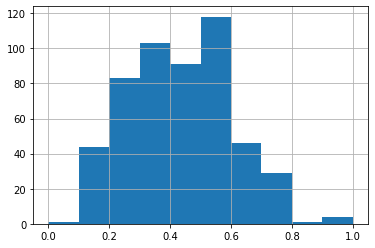

In [4]:
df["Age"].hist()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)

### ANN Implementation

#### Multi-layer Perceptron

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
parameters = {'solver': ['adam'], 
 'max_iter': [1000,10000,100000], 
 'alpha': 10.0 ** -np.arange(3, 6), 
 'hidden_layer_sizes':[(16),(32,16),(32,12,4)], 
 'random_state':[0,1,10],
  'validation_fraction':[0.3]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, verbose=1, return_train_score = True)
 
clf.fit(df.iloc[:,:-1], df.iloc[:,-1])

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/Users/cristiandiazalvarez/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   42.5s finished
/Users/cristiandiazalvarez/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     rando...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.e-03, 1.e-04, 1.e-05]),
                         'hidden_layer_sizes': [16, (32, 16), (32, 12, 4)],
        

#### Perceptron

In [8]:
display(pd.DataFrame(clf.cv_results_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_max_iter,param_random_state,param_solver,param_validation_fraction,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.281316,0.133462,0.003209,0.002015,0.001,16,1000,0,adam,0.3,...,0.925287,0.982558,0.950000,0.023951,52,0.982659,0.99422,0.991379,0.989419,0.004919
1,1.121589,0.075285,0.002126,0.000443,0.001,16,1000,1,adam,0.3,...,0.919540,0.982558,0.948077,0.026001,70,0.988439,0.99422,0.994253,0.992304,0.002733
2,1.152893,0.097503,0.001772,0.000029,0.001,16,1000,10,adam,0.3,...,0.936782,0.982558,0.953846,0.020322,22,0.979769,0.99422,0.991379,0.988456,0.006251
3,1.232092,0.134263,0.001741,0.000081,0.001,16,10000,0,adam,0.3,...,0.925287,0.982558,0.950000,0.023951,52,0.982659,0.99422,0.991379,0.989419,0.004919
4,1.084703,0.101318,0.001758,0.000026,0.001,16,10000,1,adam,0.3,...,0.919540,0.982558,0.948077,0.026001,70,0.988439,0.99422,0.994253,0.992304,0.002733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1.308875,0.215877,0.002121,0.000107,1e-05,"(32, 12, 4)",10000,1,adam,0.3,...,0.931034,0.976744,0.951923,0.018821,37,0.985549,1.00000,0.988506,0.991352,0.006233
77,3.056963,1.121885,0.001847,0.000275,1e-05,"(32, 12, 4)",10000,10,adam,0.3,...,0.925287,0.616279,0.821154,0.144053,79,0.979769,1.00000,0.614943,0.864904,0.176942
78,0.886153,0.060674,0.002168,0.000079,1e-05,"(32, 12, 4)",100000,0,adam,0.3,...,0.919540,0.982558,0.950000,0.025731,52,0.991329,1.00000,0.994253,0.995194,0.003602
79,1.257637,0.178266,0.002095,0.000164,1e-05,"(32, 12, 4)",100000,1,adam,0.3,...,0.931034,0.976744,0.951923,0.018821,37,0.985549,1.00000,0.988506,0.991352,0.006233


In [9]:
pd_results = pd.DataFrame(clf.cv_results_)
pd_results = pd_results.sort_values(by='rank_test_score',ascending=True)
pd_results.head(20)
#best_idx = pd_results['rank_test_score'].sort_values(reverse=True)

#pd.set_option('display.max_columns', None)
#pd.DataFrame(pd_results[best_idx:best_idx+1])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_max_iter,param_random_state,param_solver,param_validation_fraction,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
65,0.893329,0.049558,0.002025,0.000011,1e-05,"(32, 16)",1000,10,adam,0.3,...,0.931034,0.982558,0.965385,0.024359,1,0.991329,1.00000,0.994253,0.995194,0.003602
71,0.838954,0.017923,0.002512,0.000620,1e-05,"(32, 16)",100000,10,adam,0.3,...,0.931034,0.982558,0.965385,0.024359,1,0.991329,1.00000,0.994253,0.995194,0.003602
68,0.835160,0.054240,0.002381,0.000258,1e-05,"(32, 16)",10000,10,adam,0.3,...,0.931034,0.982558,0.965385,0.024359,1,0.991329,1.00000,0.994253,0.995194,0.003602
38,0.860680,0.042197,0.002292,0.000472,0.0001,"(32, 16)",1000,10,adam,0.3,...,0.919540,0.982558,0.959615,0.028509,4,0.991329,1.00000,0.994253,0.995194,0.003602
17,0.875288,0.045487,0.003943,0.002286,0.001,"(32, 16)",100000,10,adam,0.3,...,0.919540,0.982558,0.959615,0.028509,4,0.991329,1.00000,0.994253,0.995194,0.003602
44,0.878601,0.069140,0.002063,0.000061,0.0001,"(32, 16)",100000,10,adam,0.3,...,0.919540,0.982558,0.959615,0.028509,4,0.991329,1.00000,0.994253,0.995194,0.003602
14,0.886773,0.045451,0.002274,0.000559,0.001,"(32, 16)",10000,10,adam,0.3,...,0.919540,0.982558,0.959615,0.028509,4,0.991329,1.00000,0.994253,0.995194,0.003602
41,0.858532,0.065871,0.002671,0.000812,0.0001,"(32, 16)",10000,10,adam,0.3,...,0.919540,0.982558,0.959615,0.028509,4,0.991329,1.00000,0.994253,0.995194,0.003602
11,0.780677,0.055495,0.001862,0.000028,0.001,"(32, 16)",1000,10,adam,0.3,...,0.919540,0.982558,0.959615,0.028509,4,0.991329,1.00000,0.994253,0.995194,0.003602
66,0.851914,0.109215,0.002045,0.000041,1e-05,"(32, 16)",10000,0,adam,0.3,...,0.925287,0.982558,0.957692,0.024008,10,0.991329,1.00000,0.994253,0.995194,0.003602


In [ ]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(1,), random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-4,hidden_layer_sizes=(1,), random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-4,hidden_layer_sizes=(1,1,1), random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

## Entrenamiento de red neuronal

In [ ]:
# importar librerias de keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# definir estructura de la red neuronal
model = Sequential()
model.add(Dense(12, input_dim=16, activation='relu'))
model.add(Dense(34, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compilar red neuronal
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
len(X_train.to_numpy())

In [ ]:
# entrenar la red neuronal ajustando sus pesos basado en los datos de entrenamiento
model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=100, batch_size=10, verbose=0)

In [ ]:
# evaluar el desempeño del modelo
loss, accuracy = model.evaluate(X_test.to_numpy(), y_test.to_numpy())
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

In [ ]:
# make class predictions with the model
predictions = model.predict(X_test.to_numpy())
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X_test.to_numpy()[i].tolist(), predictions[i], y_test.to_numpy()[i]))

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test.to_numpy(), predictions)